<a href="https://colab.research.google.com/github/ejarquin99/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [1]:
import pandas as pd 

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

Check for missing/null values in the three dataframes

In [2]:
print(cell_phones.isnull().sum())
print(cell_phones.isna().sum())

geo                  0
time                 0
cell_phones_total    0
dtype: int64
geo                  0
time                 0
cell_phones_total    0
dtype: int64


In [3]:
print(population.isnull().sum())
print(population.isna().sum())

geo                 0
time                0
population_total    0
dtype: int64
geo                 0
time                0
population_total    0
dtype: int64


In [4]:
print(geo_country_codes.isnull().sum())
print(geo_country_codes.isna().sum())

geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
un_sdg_ldc                 24
un_sdg_region              25
un_state                    0
unicef_region              78
unicode_region_subtag      25
world_4region               2
world_6region              13
dtype: int64
geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  

In [5]:
print(cell_phones.head())
print(population.head())

   geo  time  cell_phones_total
0  abw  1960                0.0
1  abw  1965                0.0
2  abw  1970                0.0
3  abw  1975                0.0
4  abw  1976                0.0
   geo  time  population_total
0  afg  1800           3280000
1  afg  1801           3280000
2  afg  1802           3280000
3  afg  1803           3280000
4  afg  1804           3280000


### Part 2 - Merge data

First, merge the `cell_phones` and `population` dataframes (with an inner merge on `geo` and `time`).

The resulting dataframe's shape should be: (8786, 4)

In [8]:
cell_phones_population = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])

cell_phones_population.shape



(8786, 4)

Then, select only the `geo` and `country` columns from the `geo_country_codes` dataframe, and merge with your population and cell phone data.

The resulting dataframe's shape should be: (8786, 5)

In [24]:
geo_country_codes2 = geo_country_codes[['geo', 'country']]
cell_phones_population_country_codes = pd.merge(geo_country_codes2, cell_phones_population, how='inner')
cell_phones_population_country_codes.shape

(8786, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.230448 cell phones per person in the United States in 2017.)

In [25]:
cell_phones_population_country_codes['phones_per_person'] = cell_phones_population_country_codes['cell_phones_total'] \
 / cell_phones_population_country_codes['population_total']

cell_phones_population_country_codes[(cell_phones_population_country_codes.country=='United States') & (cell_phones_population_country_codes.time==2017)]

,geo,country,time,cell_phones_total,population_total,phones_per_person
8319,usa,United States,2017,400000000.0,325084758,1.230448


In [ ]:
merged[(merged.country=='United States') & (merged.time==2017)]

,geo,time,cell_phones_total,population_total,country,phones_per_person
8319,usa,2017,400000000.0,325084758,United States,1.230448


### Stretch Goal:
Modify the geo column to make the geo codes uppercase instead of lowercase.

In [26]:
cell_phones_population_country_codes['geo'] = cell_phones_population_country_codes['geo'].str.upper()
cell_phones_population_country_codes.head()

,geo,country,time,cell_phones_total,population_total,phones_per_person
0,AFG,Afghanistan,1960,0.0,8996967,0.0
1,AFG,Afghanistan,1965,0.0,9956318,0.0
2,AFG,Afghanistan,1970,0.0,11173654,0.0
3,AFG,Afghanistan,1975,0.0,12689164,0.0
4,AFG,Afghanistan,1976,0.0,12943093,0.0


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2018, and there are 195 unique countries represented.)

In [27]:
cell_phones_population_country_codes.describe()

,time,cell_phones_total,population_total,phones_per_person
count,8786.000000,8.786000e+03,8.786000e+03,8786.000000
mean,1994.721603,9.701331e+06,3.002185e+07,0.298025
std,14.525220,5.968296e+07,1.172833e+08,0.468332
min,1960.000000,0.000000e+00,4.377000e+03,0.000000
25%,1983.000000,0.000000e+00,1.474928e+06,0.000000
50%,1995.000000,8.500000e+03,5.816554e+06,0.002346
75%,2007.000000,2.028511e+06,1.823047e+07,0.532728
max,2018.000000,1.649302e+09,1.427648e+09,2.699755


In [61]:
cell_phones_population_country_codes.describe(exclude='number')

,geo,country
count,8786,8786
unique,195,195
top,ARM,Greece
freq,47,47


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,469,882,500 |
|    ?    |     1,168,902,277 |
|    ?    |       435,193,605 |
|    ?    |       400,000,000 |
|    ?    |       227,299,663 |


In [113]:
df = cell_phones_population_country_codes[(cell_phones_population_country_codes['time'] == 2017)]
df2= df.sort_values(by='cell_phones_total', ascending=False)

df3 = pd.concat(df2['country'], df2['cell_phones_total'])



TypeError: ignored

#Explanatory visualizations:

Explain why the figure below **cannot** be graphed as a pie chart.


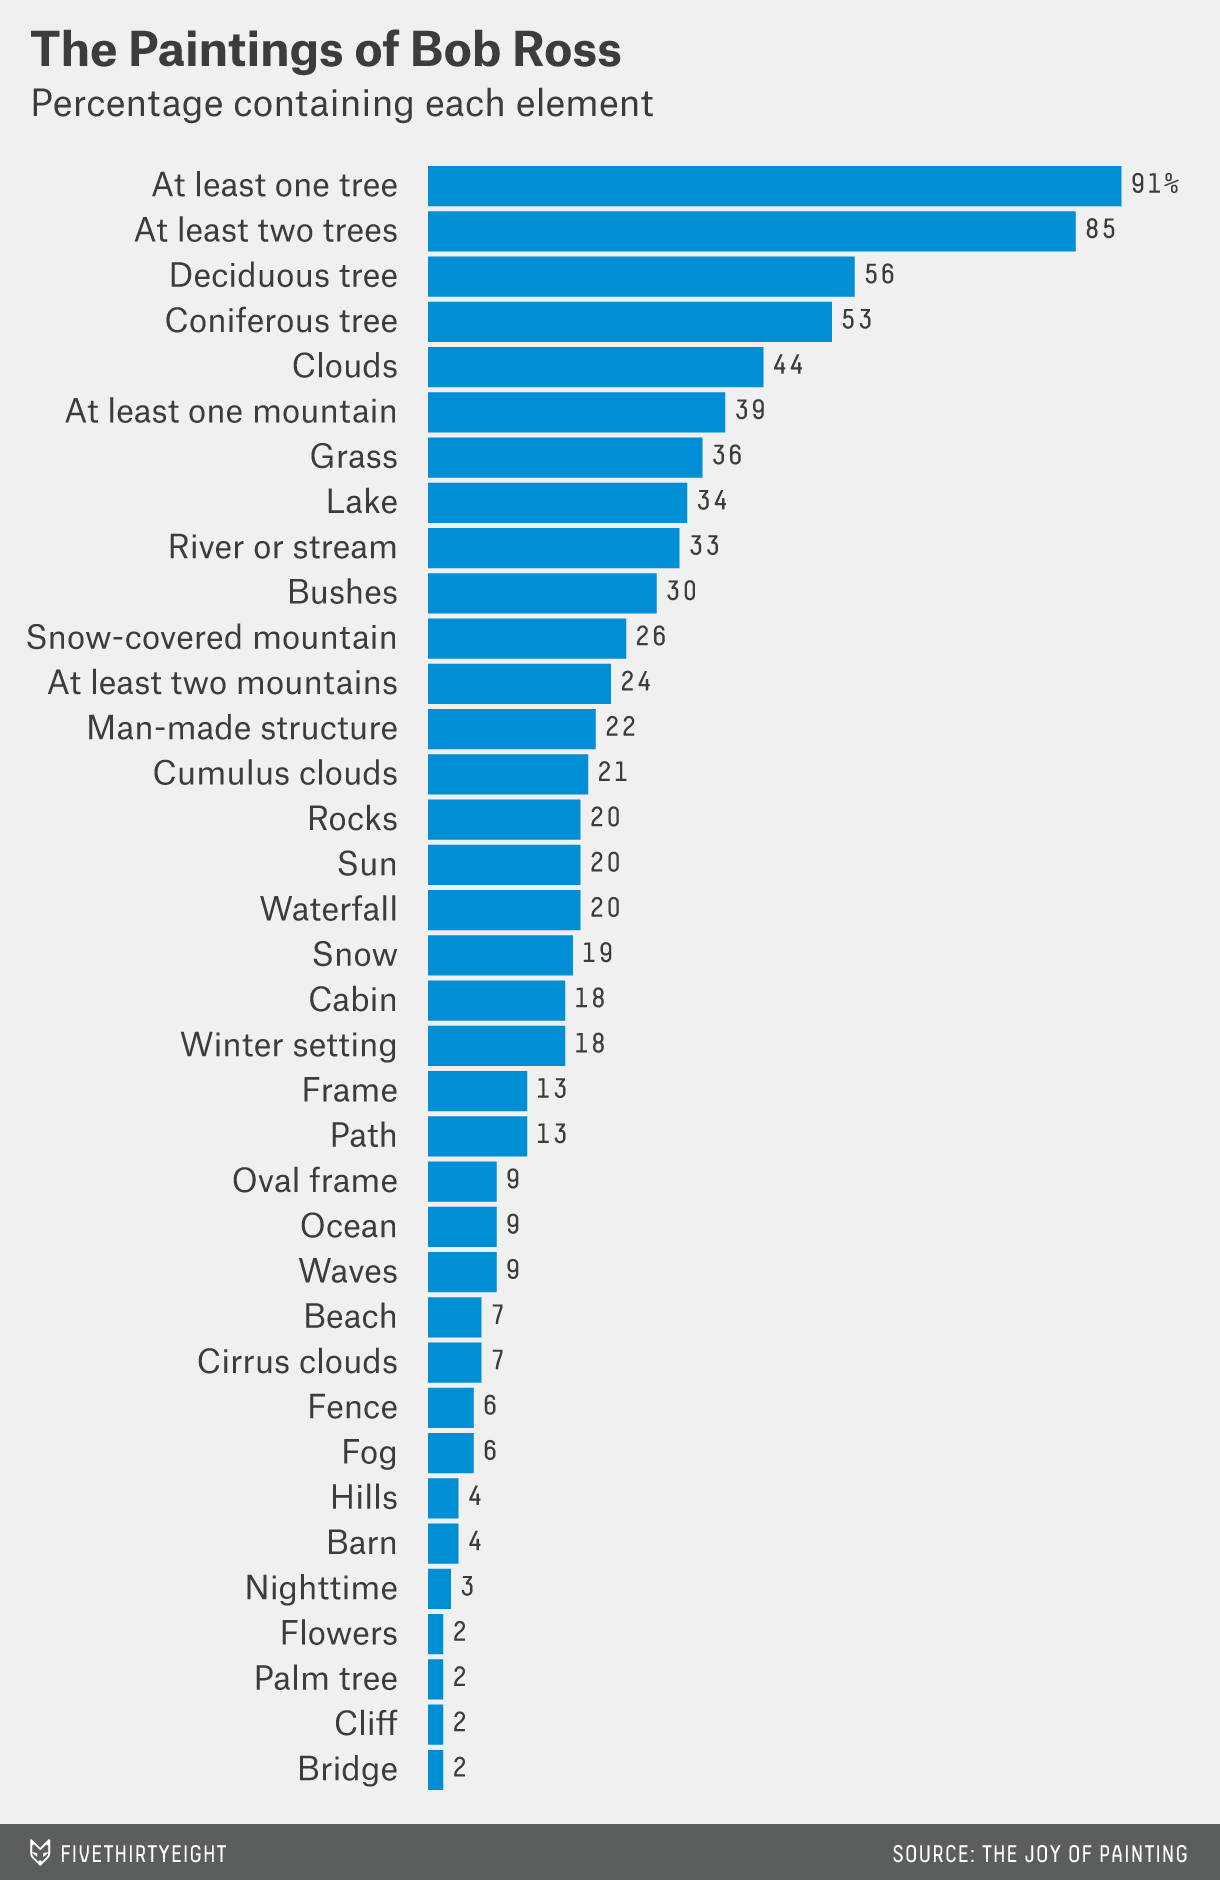

In [ ]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png'
example = Image(png, width=500)
display(example)

Way too many variables to account for, it would look like a really messy pie chart.

### Using the Titanic Data and figure, axis syntax, create a histogram of passenger age.  Describe your results in a sentence or two.

In [47]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


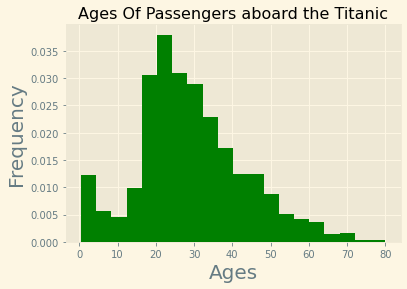

In [60]:
plt.style.use('Solarize_Light2')
num_bins = 20

fig, ax = plt.subplots()

ax.hist(Titanic['Age'], num_bins, density=1, color='green')

ax.set_xlabel('Ages', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.set_title('Ages Of Passengers aboard the Titanic')

plt.show()

It seems that most of the passengers were in their 20's and early to late 30's.